In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<AxesSubplot:xlabel='loan_status', ylabel='count'>

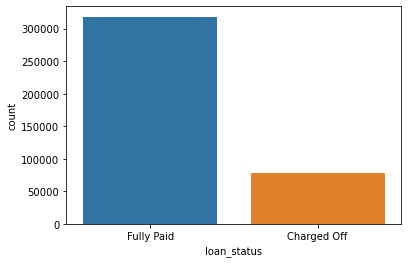

In [3]:
sns.countplot(x='loan_status',data=df)

<Figure size 864x288 with 0 Axes>

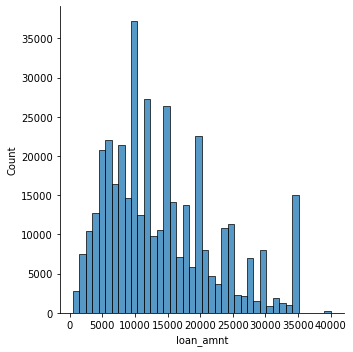

In [4]:
plt.figure(figsize=(12,4))
sns.displot(df['loan_amnt'],kde=False,bins=40)

<AxesSubplot:>

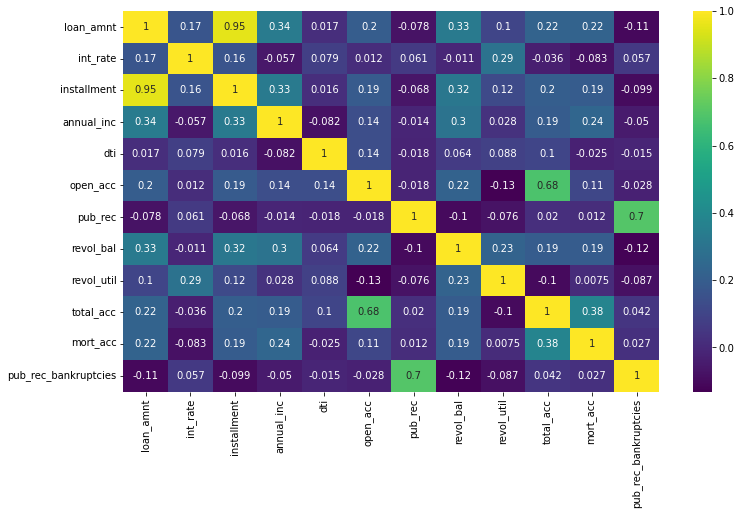

In [5]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

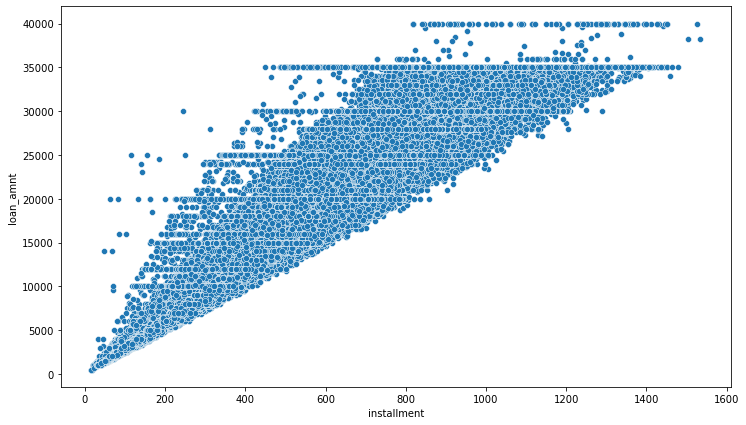

In [6]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

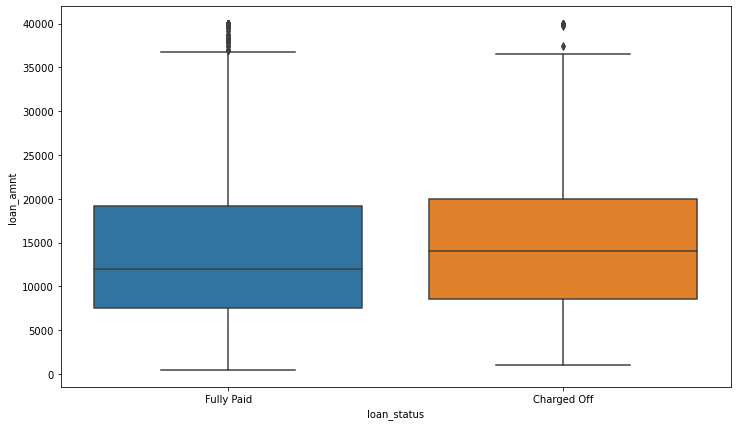

In [7]:
plt.figure(figsize=(12,7))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [8]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [9]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

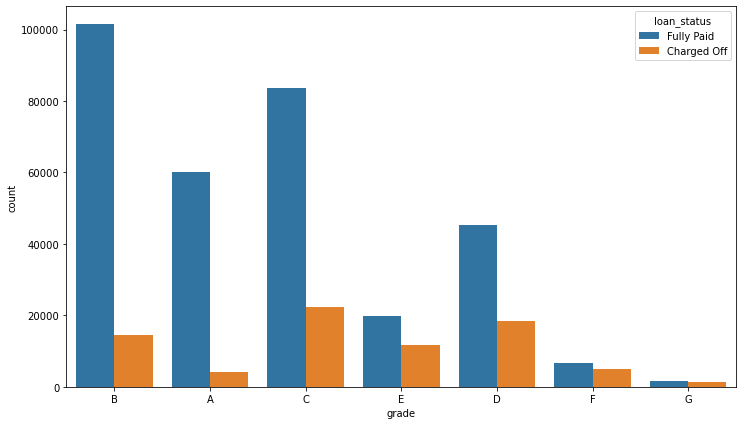

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

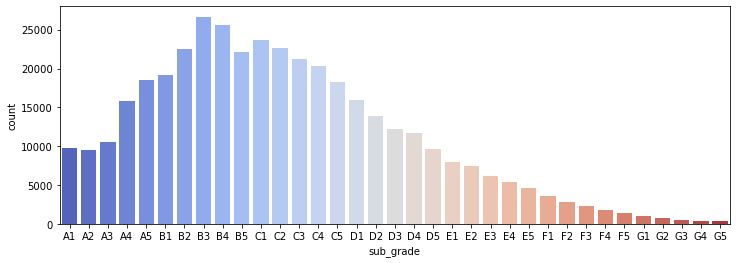

In [11]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

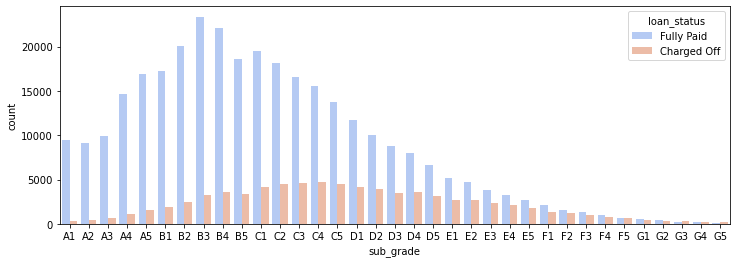

In [12]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

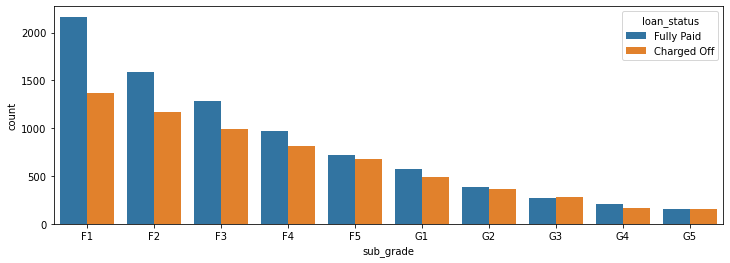

In [13]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [14]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [3]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: int(x == 'Fully Paid'))

<AxesSubplot:>

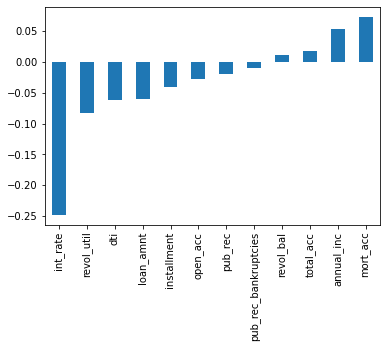

In [4]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [5]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [6]:
df['emp_title'].nunique()

173105

In [7]:
df = df.drop(['emp_title', 'emp_length','title'] ,axis=1)

In [8]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        mort_acc = total_acc_avg[total_acc]
    return mort_acc

In [9]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [10]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [11]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [12]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [13]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [14]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],
                         drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [15]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [16]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [17]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop(['earliest_cr_line', 'loan_status', 'issue_d', 'grade'] ,axis=1)

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=101)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [34]:
model = Sequential()

model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(17, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [57]:
model.fit(x=X_train, y=y_train, epochs=30, batch_size=256, validation_data=(X_test, y_test))

Train on 276653 samples, validate on 118566 samples
Epoch 1/30
  5376/276653 [..............................] - ETA: 11s - loss: 0.2497

2022-07-12 21:49:35.333759: I tensorflow/core/profiler/lib/profiler_session.cc:184] Profiler session started.


276653/276653 [==============================] - 9s 31us/sample - loss: 0.2547 - val_loss: 0.2619
Epoch 2/30
276653/276653 [==============================] - 9s 31us/sample - loss: 0.2548 - val_loss: 0.2622
Epoch 3/30
276653/276653 [==============================] - 9s 32us/sample - loss: 0.2549 - val_loss: 0.2617
Epoch 4/30
276653/276653 [==============================] - 9s 31us/sample - loss: 0.2546 - val_loss: 0.2618
Epoch 5/30
276653/276653 [==============================] - 9s 33us/sample - loss: 0.2543 - val_loss: 0.2619
Epoch 6/30
276653/276653 [==============================] - 9s 32us/sample - loss: 0.2544 - val_loss: 0.2617
Epoch 7/30
276653/276653 [==============================] - 9s 33us/sample - loss: 0.2543 - val_loss: 0.2613
Epoch 8/30
276653/276653 [==============================] - 9s 34us/sample - loss: 0.2543 - val_loss: 0.2616
Epoch 9/30
276653/276653 [==============================] - 9s 31us/sample - loss: 0.2540 - val_loss: 0.2614
Epoch 10/30
276653/276653 [===

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save('Lending Club.h5')  

In [49]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

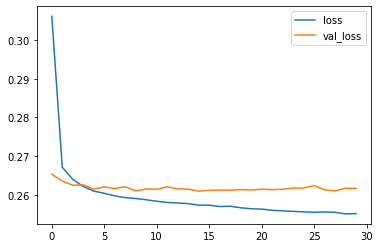

In [50]:
losses[['loss','val_loss']].plot()

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
predictions = model.predict_classes(X_test)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61     23363
           1       0.88      0.99      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.92      0.72      0.77    118566
weighted avg       0.89      0.89      0.87    118566



In [54]:
confusion_matrix(y_test,predictions)

array([[10521, 12842],
       [  514, 94689]])

In [44]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [45]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]], dtype=int32)

In [46]:
df.iloc[random_ind]['loan_repaid']

1.0